# Mushroom Data Classification

## Abstract
----
The fungal 

## Introduction
----

Fungi constitute the second largest group of organisms based on global richness estimates. Being ubiquitos in terrestial, freshwatera and marine ecosystems they populate every corner of the planet. Fungi are known to carry preform some of the most important enviromental ecological processes from decomposers of organic material contributing to nutrient cycles, parasites controlling host population structure, anaerobic gut mutualists to mutualists with autotrophic organisms. Fungi also have economic impact as plant and animal pathogens, in the biological control of crop pests, in the food and pharmaceutical industry, as edible mushrooms, and are also applied as indicators of environmental health[1].

Recently there has been an surge in fungi related research. In 2019 Johns hopkins launched a center for the study of of psychedelic compounds found in mushrooms as treatment for mental health disorders[2] with various regions and cities recently decrimializing psychedelic mushrooms for recreational use[3]. In micro textile and supplements industries mushrom-based products are growing with the demand for eco-friendly products increases in ther US[4]. There is also renewed research into Mushrooms as a source for antibiotics capable of treating the emerging antibiotic resistant bacteria, mushrooms being one of the first sources of antibiotics[5]. 

This resergance of research into mushrooms brigns with it the need to development more universal, inexpensive and esay to use systems of mushroom classification. In this project Machine Learning learning is used to development such a system of classifying mushrooms. Given the phyical characteritics of an unknown mushroom and the phyical characteristics of known mushroom species common to the area, can a Machine Learning Algorithm be developed to consistantly and accuratly predict the unknown mushrooms species?

## Background
----


Accurate and precise identification of fungi is challenging. Compared to other multicellular eukaryotes, fungi have simple body plans and diagnostic features are generally limited to their sexual and asexual spore-producing bodies, requiring microscopic examination[1]. This mircoscopic identicitaition requires expertise, laborartory equitment and is not 100% accurate in differentiating species. 
Genetic-linake mapping, the gold standard of species classification, of fungi is also challenging. Deep changes occur quickly in mushroom genomes making modern hierarchical genetic classification untenable[6]. Even so this method of species classification requires even more complicated laboraroty techinques and expertise than spore printing and is not avaible to novice mushroom harvesters.    
Due to the heterogeneity of approaches to fungal taxonomy and the complexity of lineage-dependent evolutionary processes, there are no simple strategies to unambiguously identify fungi is no no single unified system in place for identifying mushrooms[6] and as such any machine learning classification system which is accurate in and of itself, inexpensive, requiring no expertise would be a welocome addition to the current systems of mushrooms classification.   

## Data
----
### UCI Mushroom Dataset

Dataset can be accessed on [UCI's ML repository]( https://archive.ics.uci.edu/ml/datasets/mushroom)

Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)

#### Dataset Information:
This data set includes 8124 categorical descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The hypothetical samples on this dataset were drawn from The Audubon Society Field Guide to North American Mushroms [2]

#### Attribute Information:

This dataset contains 22 attrubutes (23 if we include the edibility of the mushroom). 

1. **cap-shape:** bell, conical, convex, flat, knobbed, sunken
2. **cap-surface:** fibrous, grooves, scaly, smooth
3. **cap-color:** brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow
4. **bruises?:** bruises, no
5. **odor:** almond, anise, creosote, fishy, foul, musty, none, pungent, spicy
6. **gill-attachment:** attached, descending, free, notched
7. **gill-spacing:** close, crowded, distant
8. **gill-size:** broad, narrow
9. **gill-color:** black, brown, buff, chocolate, gray, green, orange, pink, purple, red, white, yellow
10. **stalk-shape:** enlarging, tapering
11. **stalk-root:** bulbous, club, cup, equal, rhizomorphs, rooted, *missing (represented as '?')*
12. **stalk-surface-above-ring:** fibrous, scaly, silky, smooth
13. **stalk-surface-below-ring:** fibrous, scaly, silky, smooth
14. **stalk-color-above-ring:** brown, buff, cinnamon, gray, orange, pink, red, white, yellow
15. **stalk-color-below-ring:** brown, buff, cinnamon, gray, orange, pink, red, white, yellow
16. **veil-type:** partial, universal
17. **veil-color:** brown, orange, white, yellow
18. **ring-number:** none, one, two
19. **ring-type:** cobwebby, evanescent, flaring, large, none,pendant, sheathing, zone
20. **spore-print-color:** black ,brown, buff, chocolate, green, orange, purple, white, yellow
21. **population:** abundant, clustered, numerous, scattered, several, solitary
22. **habitat:** grasses, leaves, meadows, paths, urban, waste, woods
23. **edibility:** edible, poisonous


### Synthetic Dataset

While the original dataset contains enough information to train a model to classify samples into edibility, it is not enough to be used for species classification as the there is no species label. In order to label this dataset, we found it appropiate to use semi-supervised learning algorithms. Although the preferred option would be to label all 8124 samples, it would take an excessive amount of time and we might need the help of some experts are mushrooms are famous for being very hard to classify. We can make use of the fact that only samples of the Agaricus and Lepiota species were included in the data set, along with the access to the primary source of the dataset [2].

Below we observe how the data is formatted in the source book:

![Sample from the book](./Images/Book-sample.PNG)
_**Figure 1: Excerpt from the field guide from which the dataset is based[2]**_

Thus, we created a simple algorithm that works as follows:

    1. A species is selected
    2. For each feature of this species, one of the possible categorical values for that given species is selected 
    3. Algorithm ends when n-samples for that species have been generated

Below we can observe how the output of the [algorithm](https://github.com/DSEI21000-S21/project-mushroom-data-classification/blob/main/Code/Species_sampler.ipynb) looks like **Species is the input, features are the output**

![Sample synthetic data](./Images/Synthetic.PNG)
_**Figure 2: Sample of synthetical dataset with only 5 features for the Lepiota americana species**_

We must clarify that this algorithm cannot be used to assign a species label to a datapoint, instead it uses a species label to generate samples that could belong to that species. There is no way we can predict a species by inputting features without using machine learning or a similar concept. If we made a look up table we will certainly end up with more than one species being a perfectly good candidate for the datapoint, thus we need machinery that can make sense of more abstract data structures (Machine Learning).
  
For our purposes, we chose to generate 5 samples per species (23 species total), totaling 115 samples

### Data Cleaning


## Methods
----
### EDA

Bar polts where taken of the catagorical varibales of the mushroom dataset to look at the distobution of values within the UCI dataset Fig[1].  

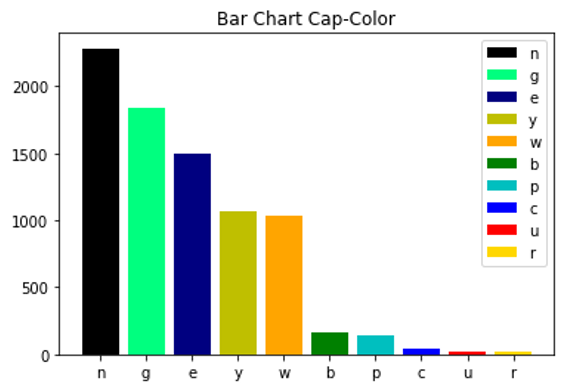

After reveiwing the distrobution of the features three features were removed from the dataset: Veil-Type (having only one value), Stalk-Root (having 30% missing values) and Ebible which gives impudes important medical information to the Machine Learning Algorithm not wanted during classification training. 

### Feature Selection and Outlier Detection

Ordinal features Gill_Spacing, Gill_Size, Stalk_Shape and Population where dummied using OneHotEncoder all other features transformed using getDummies. 
T-SNE cluster visualization made using KMeans Clustering, dataset[fig.2].


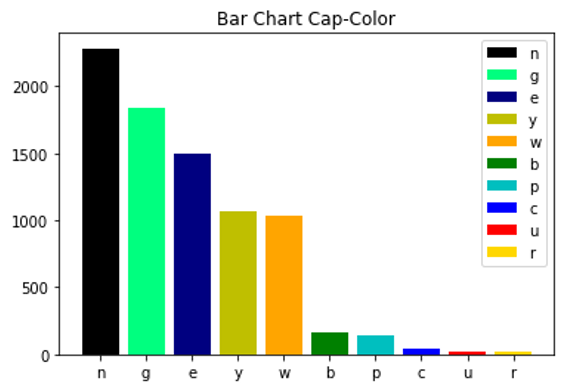

DBSCAN was used to remove  ~5% of the dataset it classified as outliers.  
PCA run on complete dataset. At 36 PCA’s 95% of population variance contained in dataset[fig.3]

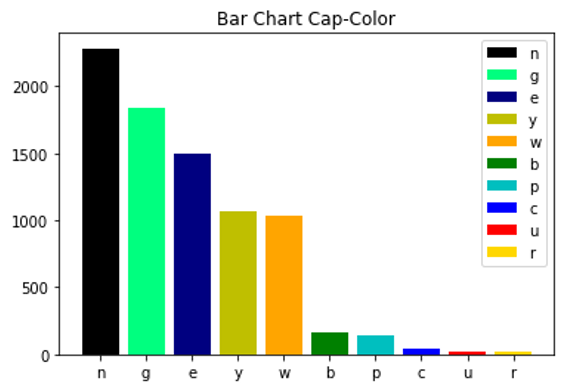


### Unsupervised Learning

Agglomerative clustering was used as the unspurvised learning clusteting algorithum. This algorithm was chosen as it is a form of heirarichal most suited for species determination. Below we see the silhoette plot of the optimized agglomerative algorithm[fig.4] 

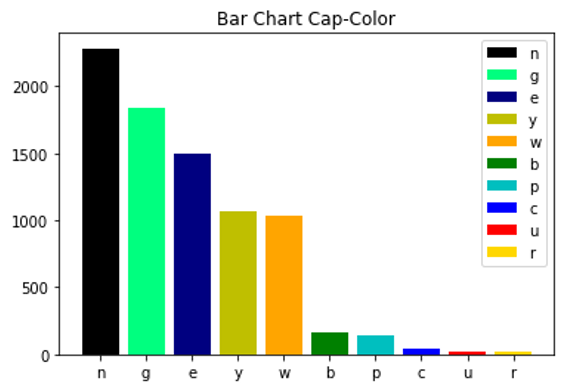

#### Model optimization and grid search

Using GridSearch the Agglomerative clustering algorithms hyperparameters where tuned. The optimized hyperparameters where 'l2' for affinity and 'single' for linakge. The scoring parameter for the GridSearch was a specailized function using the silohette score. As this is the best measure for the quality of clustering preformed by the algorithm.    

### Semi-upervised Learning

Unsupervised learning showed that there are some well defined clusters that make up our data set (Fig.x refer to 3PCA AND sillhouette diagram). Thus we can assume that the clusters correspond to a difference between some mushroom species, thus if we have enough clusters we may be able to find which clusters crorespond to each species. 

Supervised learning approaches would be the most efficient to make out clusters that have complex structures (a cluster within a cluster, overlapping clusters). But labeling over 8000 samples would be very time consuming for the scope of this project, and it would require the help of seasoned mycologists to classify mushroom species. Thus, purely supervised methods are not a valid option.

Semi-supervised algorithms allow us to learn from our unlabaled data by using a very small subset of labeled samples in combination to the structure of the data itself. Though, our data has to satisfy at least one of the following assupmtions [3]

1. Points that are close to each other are more likely to share a label: We are dealing with species, and members that belong to the same species (share a label) will have common traits (which make up the features on our dataset).

2. Data tend to form discrete clusters: As seen on the previous section, unsupervised learing managed to capture hidden structures on our data (clusters).

scikit-learn offers two types of semi-supervised algorithms: [SelfTrainingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.SelfTrainingClassifier.html#sklearn.semi_supervised.SelfTrainingClassifier) and [LabelSpreading](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html#sklearn.semi_supervised.LabelSpreading). The self training classifier works by adapting a supervised scheme to function as a semi-supervised classifier by iteratively predicting pseudo-labels for the unlabeled data and adding them to the training set until all dataset has been assigned a label. Unfortunately, this algorithm was not avaliable to use at the time of the making of this project (we tried using the source code but that didn't work) and it would be too time consuming to recreate it for the scope of this project. Thus, the only semi-supervised model we used was label spreading. 

The label spreading algorithm iteratively creates a similarity matrix from which the points closer to the original labeled points are related to the closest unlabeled points. The algorithm stops until all points have been labeled. 

![True Labels](./Images/True-Labels.PNG)
_**Figure 3: Plot of the labeled and unlabeled datapoints using 3 principal components. Red points are points we made, while the bluepoints come from the UCI dataset**_

#### Model optimization and grid search

Our [model](https://github.com/DSEI21000-S21/project-mushroom-data-classification/blob/main/Code/LabelSpreading.ipynb) Optimized the following parameters:

1. **kernel {*'knn','rbf'*}:** The rbf kernel produces a fully connected graph, while knn produces a sparse graph. Since our dataset is not incredibly big, we will use the rbf kernel (not included in gridsearch as the the answer is obvious).
2. **gamma (*float*):** This parameter adjusts the complexity of the rbf kernel, the higher the number the more complex the model but it might overfit, while a number too low will leave to high bias.
3. **n_neighbors (*int*):** This parameter adjusts the behaviour of the knn kernel and complexity of the boundaries. 
4. **alpha (*float*):** A value between 0 and 1. A value of zero will keep the original labeled data as is, while a value of 1 will allow the model to change the orignal labels while velues in between will set a threshold for original label replacement.

The best parameters were chosen to be, 

* kernel: *'rbf'*
* gamma: *1*
* alpha: *0.2*

## Evaluation
----
### KNN as a baseline classifier

#### Silhouette plot analysis

### Agglomerative clustering results

#### Silhouette plot analysis

### Semi-supervised learning results

Our semi-supervised model successfully assigned a label to all the points in the unlabeled dataset. Unfortunately, the model struggled to differentiate 9 species from other clusters as seen in **Figs. X and X**.

![Good cluster](./Images/good_cluster.PNG)

_**Figure X: Plot of the points labeled as Agaricus haemorrhoidarius (red) using 3 principal components. We observe that the cluster follows the structure of the unlabeled data thus we can be condident that the clustering is correct**_

![Bad cluster](./Images/bad_cluster.PNG)

_**Figure X: Plot of the points labeled as Lepiota artodisca (red) using 3 principal components. We observe that the cluster does not have many points in it**_

The following species had poor labeling (few datapoints in their cluster):

1. *Agaricus subrutilescens*
2. *Lepiota acutesquamosa*
3. *Lepiota artodisca*
4. *Lepiota cepaestipes*
5. *Lepiota clypeolaria*
6. *Lepiota josserandi*
7. *Lepiota lutea*
8. *Lepiota procera*
9. *Lepiota rachodes*

#### Silhouette plot analysis 

The silhouette plot seen in **Fig.X** shows the quality of the labeling obtained using our semi-supervised model. It uses scikit-learn's [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) and [silhouette_samples](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples) functions. Each line represents the sulhouette score for a single datapoint, lines of the same color have the same labels. Scores range from -1 to 1. A positive value corresponds to some certainty that the datapoint belongs to its cluster, a value of zero corresponds to total uncertainty about the label of the datapoint, and a negative value corresponds to some certainty that the datapoint does not belong to its cluster.

![Silhouette Plot](./Images/sil_plot.png)
_**Figure X: Sillhouete plot of the labeled clusters obtained using the optimized Label Spreading algorithm. The dotted red line corresponds to the average silhouette score for all datapoints. We can clearly see which species the model had a hard time with**_

### Supervised learning


## Conclusion
----

*Insert results and discussion about unsupervised results* 

*Insert results and discussion about supervised results* 


Our semi-supervised algorithm showed that some clusters can be assigned a species, but there are not enough "spherical" clusters or some clusters heavily overalp which results in subpar labeling of some species. This can be due to a few things: 
1. Our assumption that the unlabeled dataset follows an uniform distribution of spewcies is wrong (*__possible__, as the authors may have had an non-uniform distribution of species*)
2. The UCI dataset contains less species than originally thought (*__unlikely__, as this would imply that the authors of the dataset published erroneous information*).
3. Some species are too similar to be distinguished with the features used in this study. If a species' features are a subset or overlap with another species' features, our model cannot distinguish them (_**likely**_)

We also observe that the silhouette plots from our semisupevised-labeled data have similar properties than that of the optimized agglomerative clustering. Thus, we can conclude that the semisupervised model extracted as much information from the structure of the data as possible, and that further optimization would lead to diminishing returns. Though, when compared the labeling done by the supervised model trained only on the 115 labeled samples, we can see that the semisupervised model had a higher performance as some species have a very poor F1 score. 

Further approaches to our efforts would include the collection and construction of a robust mushrom image dataset, as images can potentially contain more information than descriptive data. Further, if the classification of image data is successful, we can collaborate with current social network of citizen scientists *iNaturalist*. Working with them we can get access to thousands of images, not only of mushrooms but of varous plants, animals. This social network uses it's community of experts to label the photos other members require identification for. We could offer our model to classify or give possible species to users in a short time. Another functionality to our efforts would be to **insert what the professor talked about**, 

## Attribution
----
Here we put bar graphs from Guthub showing our commits over time and self-report how many code-hours of work are visible in the repo.

## Bibliography
----
1. Lücking, Robert et al. “Unambiguous identification of fungi: where do we stand and how accurate and precise is fungal DNA barcoding?.” IMA fungus vol. 11 14. 10 Jul. 2020, doi:10.1186/s43008-020-00033-z
2. https://hub.jhu.edu/2019/09/04/hopkins-launches-psychedelic-center/
3. https://www.newsweek.com/dc-initiative-81-psychedelics-magic-mushrooms-decriminalized-1576502
4.https://smallfarms.cornell.edu/projects/mushrooms/specialty-mushroom-cultivation/defining-the-specialty-mushroom-industry/
5. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4483641/
6. Naranjo-Ortiz, Miguel A, and Toni Gabaldón. “Fungal evolution: cellular, genomic and metabolic complexity.” Biological reviews of the Cambridge Philosophical Society vol. 95,5 (2020): 1198-1232. doi:10.1111/brv.12605
2. https://archive.ics.uci.edu/ml/datasets/mushroom
3.  Alfred A. Knopf, The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York
4. Vapnik, V.; Chervonenkis, A. (1974). Theory of Pattern Recognition (in Russian). Moscow: Nauka. cited in Chapelle, Schölkopf & Zienin 2006, p. 3


## Appendix
----
We can put the extra work we did here: Edibility classification and its EDA/evaluation